<a href="https://colab.research.google.com/github/O-keita/Air-Quality-Forecasting/blob/main/air_quality_forecasting_starter_code_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Beijing Air Quality Forecasting Starter Notebook

In [1227]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import  StandardScaler, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Input,Bidirectional
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError
import tensorflow as tf

In [1228]:
# Mount Google Drive to access datasets
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1229]:
# Load the datasets
# Ensure train.csv and test.csv are saved in your Google Drive in the same folder.
# Replace the file paths below with the actual paths to your dataset.
train = pd.read_csv('/content/drive/MyDrive/Kaggle_competition_ML/air_quality_forcasting/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Kaggle_competition_ML/air_quality_forcasting/test.csv')


# Explore the training data

In this sections explore your dataset with appropiate statistics and visualisations to understand your better. Ensure that you explain output of every code cell and what it entails.



1.   We will first explore the first five rows of the data to some insights
2.   We will explore the data types, making sure each column is in their
approciate data type
3. Checking the number of null values we have
4. converting datetime column to datetime
5. ploting the data to see the distribution and identifying outliers
6. Plotting a correlation map to see how each feature relates to the target variable, and deciding if we are going to use more columns or less









In [1230]:
# Inspecting the first few rows of the dataset to understand its structure.
print("Training Data Overview:")
train.head()

Training Data Overview:


,No,DEWP,TEMP,PRES,Iws,Is,Ir,datetime,cbwd_NW,cbwd_SE,cbwd_cv,pm2.5
0,1,-1.580878,-1.922250,0.443328,-0.441894,-0.069353,-0.137667,2010-01-01 00:00:00,1.448138,-0.732019,-0.522096,NaN
1,2,-1.580878,-2.004228,0.345943,-0.379306,-0.069353,-0.137667,2010-01-01 01:00:00,1.448138,-0.732019,-0.522096,NaN
2,3,-1.580878,-1.922250,0.248559,-0.343514,-0.069353,-0.137667,2010-01-01 02:00:00,1.448138,-0.732019,-0.522096,NaN
3,4,-1.580878,-2.168183,0.248559,-0.280926,-0.069353,-0.137667,2010-01-01 03:00:00,1.448138,-0.732019,-0.522096,NaN
4,5,-1.511594,-2.004228,0.151174,-0.218339,-0.069353,-0.137667,2010-01-01 04:00:00,1.448138,-0.732019,-0.522096,NaN


In [1231]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30676 entries, 0 to 30675
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   No        30676 non-null  int64  
 1   DEWP      30676 non-null  float64
 2   TEMP      30676 non-null  float64
 3   PRES      30676 non-null  float64
 4   Iws       30676 non-null  float64
 5   Is        30676 non-null  float64
 6   Ir        30676 non-null  float64
 7   datetime  30676 non-null  object 
 8   cbwd_NW   30676 non-null  float64
 9   cbwd_SE   30676 non-null  float64
 10  cbwd_cv   30676 non-null  float64
 11  pm2.5     28755 non-null  float64
dtypes: float64(10), int64(1), object(1)
memory usage: 2.8+ MB
None


In [1232]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13148 entries, 0 to 13147
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   No        13148 non-null  int64  
 1   DEWP      13148 non-null  float64
 2   TEMP      13148 non-null  float64
 3   PRES      13148 non-null  float64
 4   Iws       13148 non-null  float64
 5   Is        13148 non-null  float64
 6   Ir        13148 non-null  float64
 7   datetime  13148 non-null  object 
 8   cbwd_NW   13148 non-null  float64
 9   cbwd_SE   13148 non-null  float64
 10  cbwd_cv   13148 non-null  float64
dtypes: float64(9), int64(1), object(1)
memory usage: 1.1+ MB
None


In [1233]:
print(train.isnull().sum(), test.isnull().sum())
# our pm2.5 for training data has around 1921 missing data

No             0
DEWP           0
TEMP           0
PRES           0
Iws            0
Is             0
Ir             0
datetime       0
cbwd_NW        0
cbwd_SE        0
cbwd_cv        0
pm2.5       1921
dtype: int64 No          0
DEWP        0
TEMP        0
PRES        0
Iws         0
Is          0
Ir          0
datetime    0
cbwd_NW     0
cbwd_SE     0
cbwd_cv     0
dtype: int64


In [1234]:
train.columns

Index(['No', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir', 'datetime', 'cbwd_NW',
       'cbwd_SE', 'cbwd_cv', 'pm2.5'],
      dtype='object')

In [1235]:
# Ensure 'datetime' column is in datetime format
train['datetime'] = pd.to_datetime(train['datetime'])

test['datetime'] = pd.to_datetime(test['datetime'])

train['hour'] = train['datetime'].dt.hour
train['dayofweek'] = train['datetime'].dt.dayofweek
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['year'] = train['datetime'].dt.year



test['hour'] =test['datetime'].dt.hour
test['dayofweek'] =test['datetime'].dt.dayofweek
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['year'] = test['datetime'].dt.year
# Set the 'datetime' column as the index for better time-series handling
train.set_index('datetime', inplace=True)
# val.set_index('datetime', inplace=True)
test.set_index('datetime', inplace=True)





In [1236]:
train

,No,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NW,cbwd_SE,cbwd_cv,pm2.5,hour,dayofweek,month,day,year
datetime,,,,,,,,,,,,,,,,
2010-01-01 00:00:00,1,-1.580878,-1.922250,0.443328,-0.441894,-0.069353,-0.137667,1.448138,-0.732019,-0.522096,NaN,0,4,1,1,2010
2010-01-01 01:00:00,2,-1.580878,-2.004228,0.345943,-0.379306,-0.069353,-0.137667,1.448138,-0.732019,-0.522096,NaN,1,4,1,1,2010
2010-01-01 02:00:00,3,-1.580878,-1.922250,0.248559,-0.343514,-0.069353,-0.137667,1.448138,-0.732019,-0.522096,NaN,2,4,1,1,2010
2010-01-01 03:00:00,4,-1.580878,-2.168183,0.248559,-0.280926,-0.069353,-0.137667,1.448138,-0.732019,-0.522096,NaN,3,4,1,1,2010
2010-01-01 04:00:00,5,-1.511594,-2.004228,0.151174,-0.218339,-0.069353,-0.137667,1.448138,-0.732019,-0.522096,NaN,4,4,1,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-07-01 23:00:00,30672,1.467633,0.946961,-2.088668,-0.415099,-0.069353,2.687490,-0.690542,-0.732019,-0.522096,50.0,23,0,7,1,2013
2013-07-02 00:00:00,30673,1.329064,0.864984,-2.186052,-0.379306,-0.069353,3.393779,1.448138,-0.732019,-0.522096,41.0,0,1,7,2,2013
2013-07-02 01:00:00,30674,1.259780,0.701029,-2.088668,-0.263130,-0.069353,4.100068,1.448138,-0.732019,-0.522096,32.0,1,1,7,2,2013


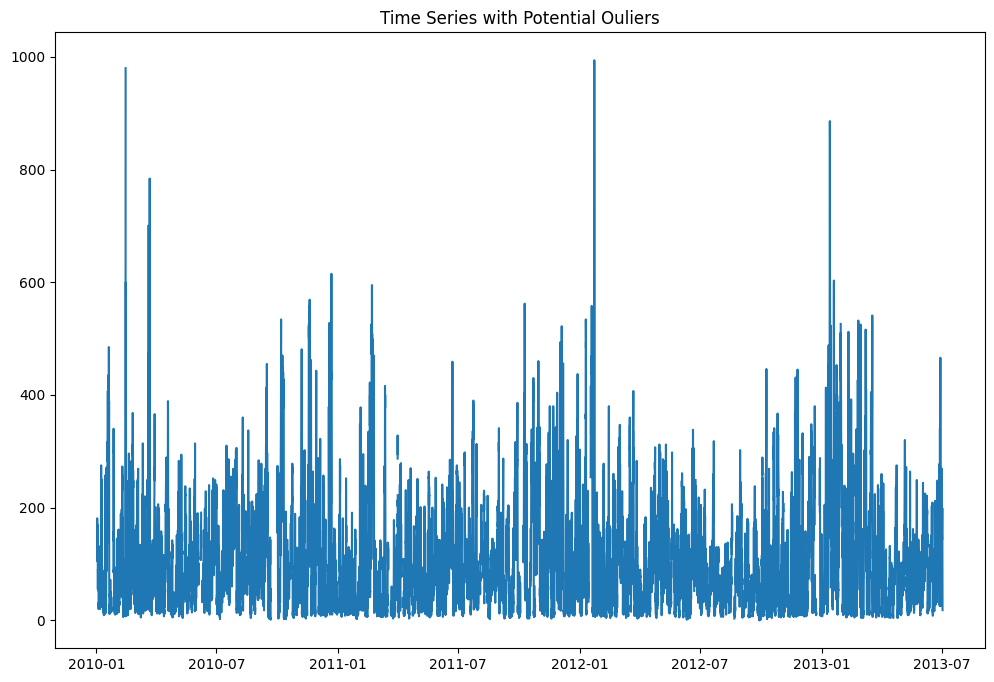

In [1237]:
#checking for outliers
plt.figure(figsize=(12, 8))
plt.plot(train.index,train['pm2.5'])
plt.title('Time Series with Potential Ouliers')
plt.show()



# From the plot above its clear that we have ouliers

In [1238]:
Q1 = train['pm2.5'].quantile(0.25)
Q3 = train['pm2.5'].quantile(0.75)

IQR = Q3 - Q1

outliers = train[(train['pm2.5'] < Q1 - 1.5 * IQR) | (train['pm2.5'] > Q3 + 1.5*IQR)]

print(f"Outliers percentage: {100 * len(outliers) / len(train):.2f}%")
train = train[(train['pm2.5'] >= Q1 - 1.5 * IQR) & (train['pm2.5'] <= Q3 + 1.5*IQR)]




Outliers percentage: 3.40%


# Dropping Ouliers
Ouliers of 3.6% is below 5% which is not that reasonable so we decide to remove them for now


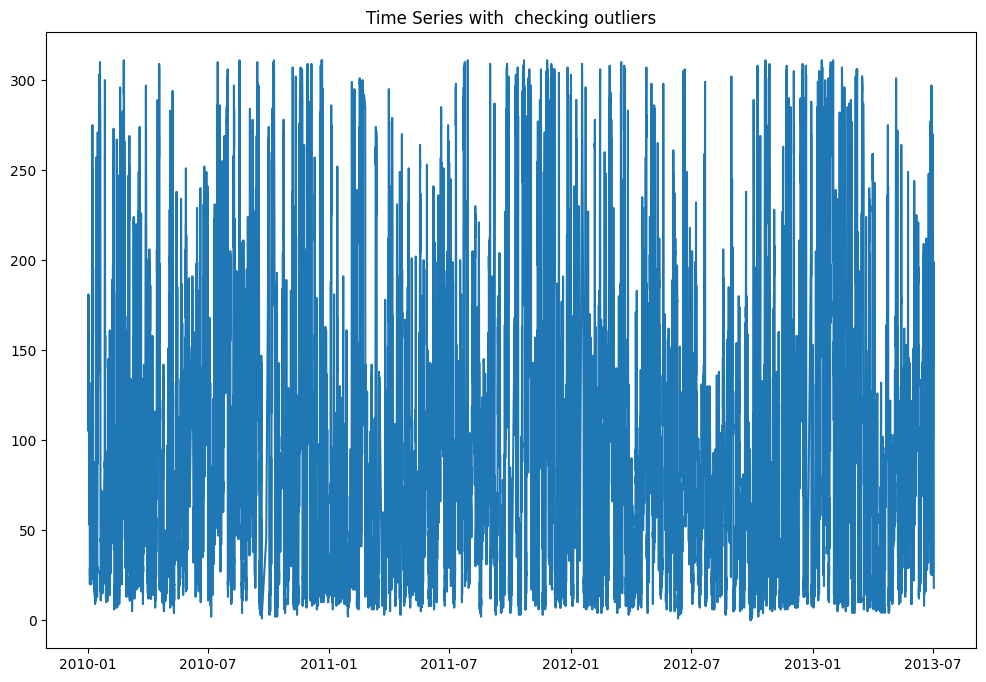

In [1239]:

plt.figure(figsize=(12, 8))
plt.plot(train.index,train['pm2.5'])
plt.title('Time Series with  checking outliers')
plt.show()



# Correlation HeatMap


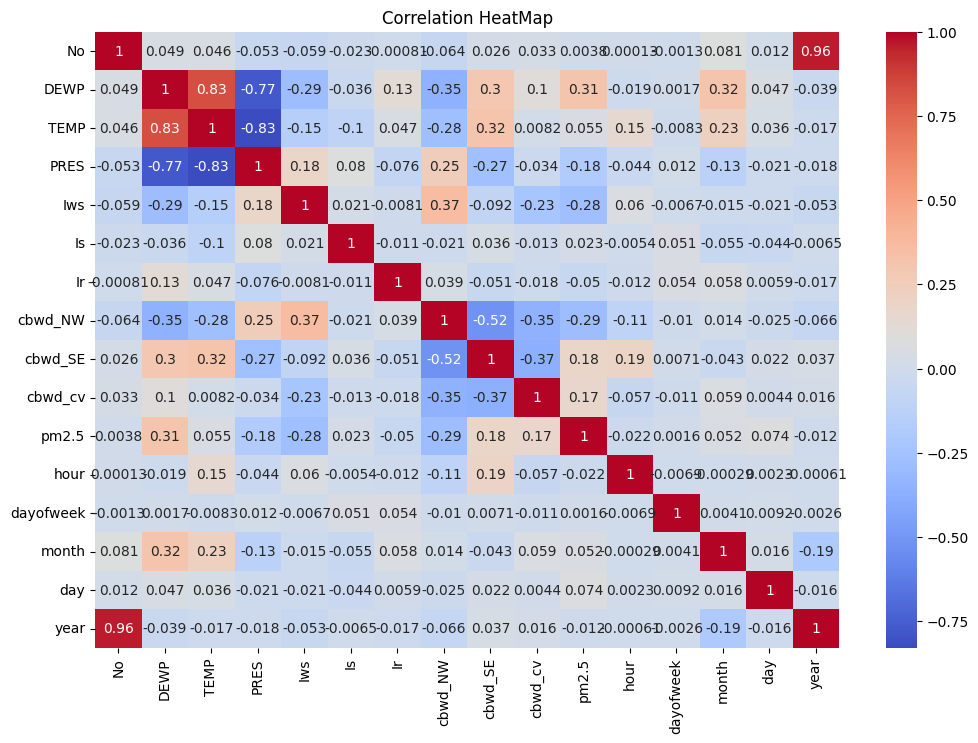

In [1240]:
#get correlation

corr = train.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation HeatMap")
plt.show()

In [1241]:
#correlation values to pm2.5
corr_target=corr['pm2.5'].sort_values(ascending=False)
print(corr_target)

pm2.5        1.000000
DEWP         0.307676
cbwd_SE      0.182918
cbwd_cv      0.167868
day          0.073828
TEMP         0.055201
month        0.052211
Is           0.022730
No           0.003830
dayofweek    0.001552
year        -0.012206
hour        -0.022241
Ir          -0.050484
PRES        -0.182642
Iws         -0.277479
cbwd_NW     -0.290209
Name: pm2.5, dtype: float64


/tmp/ipython-input-178468698.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_target.values, y=corr_target.index, palette="coolwarm")


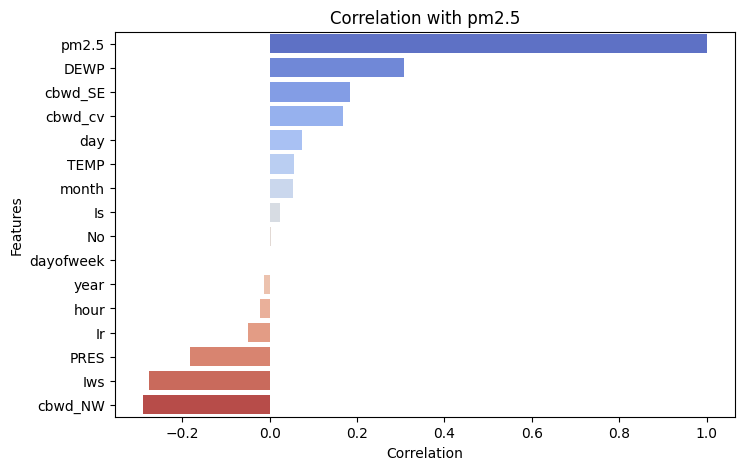

In [1242]:
plt.figure(figsize=(8, 5))
sns.barplot(x=corr_target.values, y=corr_target.index, palette="coolwarm")
plt.title("Correlation with pm2.5")
plt.xlabel("Correlation")
plt.ylabel("Features")
plt.show()

# Interpreting our correlation
The features [TEMP, Is, No] have almost no relationship with our target value pm2.5, which we might end up to drop to see if our training might improve

# Handle missing values


- Check the dataset for missing values and decide how to handle them.
- In this example, missing values are filled with the mean. You can experiment with other strategies.

In [1243]:

#lets preprocess datetime


train = train.fillna(train.mean)
test = test.fillna(test.mean, )



In [1244]:
train.index

DatetimeIndex(['2010-01-02 00:00:00', '2010-01-02 01:00:00',
               '2010-01-02 02:00:00', '2010-01-02 03:00:00',
               '2010-01-02 04:00:00', '2010-01-02 05:00:00',
               '2010-01-02 06:00:00', '2010-01-02 07:00:00',
               '2010-01-02 08:00:00', '2010-01-02 09:00:00',
               ...
               '2013-07-01 18:00:00', '2013-07-01 19:00:00',
               '2013-07-01 20:00:00', '2013-07-01 21:00:00',
               '2013-07-01 22:00:00', '2013-07-01 23:00:00',
               '2013-07-02 00:00:00', '2013-07-02 01:00:00',
               '2013-07-02 02:00:00', '2013-07-02 03:00:00'],
              dtype='datetime64[ns]', name='datetime', length=27712, freq=None)

# checking if our target variable is scaled

the result below shows that our  target variable is clearly not scaled so up next we are going to scale the target variable (pm2.5)

In [1245]:
pm25 = train['pm2.5']
print("Min", pm25.min())
print("Max", pm25.max())
print("Mean", pm25.mean())
print("std", pm25.std())

scaler = StandardScaler()
# train['pm2.5'] = scaler.fit_transform(train[['pm2.5']]) #the model is not improving

print("=======================After Scaling===============================")
print("Min", pm25.min())
print("Max After Scaling", pm25.max())
print("Mean", pm25.mean())
print("std", pm25.std())


Min 0.0
Max 311.0
Mean 89.51291859122402
std 72.21110560248913
=======================After Scaling===============================
Min 0.0
Max After Scaling 311.0
Mean 89.51291859122402
std 72.21110560248913


# Separate features and target

- Feel free to trop any non-essential columns like that you think might not contribute to modeling.

In [1246]:
train = train.reset_index(drop=True)
X_train = train.drop(['pm2.5', 'No', 'Is', 'TEMP'], axis=1)
y_train = train['pm2.5']

In [1247]:
print(X_train.shape)
print(y_train[:2])

(27712, 12)
0    129.0
1    148.0
Name: pm2.5, dtype: float64


In [1248]:
def create_seq(X, y, window_size):
  X_windows, y_windows = [], []

  for i in range(window_size, len(X)):
    X_windows.append(X[i-window_size:i])
    y_windows.append(y[i])

  return np.array(X_windows), np.array(y_windows)

In [1249]:
window_size = 24
X_win, y_win = create_seq(X_train, y_train, window_size)


print(X_win.shape)
print(y_win.shape)

(27688, 24, 12)
(27688,)


In [1250]:
# Reshape data for LSTM input
# LSTM models require data in the shape (samples, timesteps, features).
# Here, the data is reshaped to add a "timesteps" dimension.
X_train = np.expand_dims(X_win, axis=1)
y_train = y_win

# Build model

Below is a simple LSTM model. Your task is to experiment with different parameters like, numbers of layers, units, activation functions, and optimizers, etc to get the best performing model. Experiment with other optimizers (e.g., SGD) or hyperparameters to improve performance.

In [1251]:
# define model, build model as function


def build_model(input_shape, lr=0.001):

  """
  Here we define our model to be function and,
  we can train it anytime we call it

  args:

  input shape -> ()
  lr ->

  The model is a Bidirectional LSTM model with activation of tanh and relu

  """
  model = Sequential([
      Input(shape=(X_train.shape[1], X_train.shape[2])),
      Bidirectional(LSTM(128, return_sequences=True)),
      Dropout(0.3),
      Bidirectional(LSTM(64, return_sequences=True)),
      Dropout(0.2),
      Dense(64, activation='relu'),
      Dropout(0.2),
      Dense(32, activation='relu'),
      Dropout(0.2),
      Dense(1)
  ])

  # Compile the model
  optimizer = Adam(learning_rate=lr)
  model.compile(
      optimizer=optimizer,
      loss='mse',
      metrics=[lambda y, y_pred: tf.sqrt(tf.reduce_mean(tf.square(y - y_pred)))]  # RMSE metric
  )

  model.summary()
  return model








In [1252]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[2], X_train.shape[3])

In [1253]:
def train_model(model, X_train, y_train, epochs=20, batch_size=64):

  callbacks = [
      ReduceLROnPlateau(monitor='loss', patience=3, factor=0.5, verbose=1),
      EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

  ]


  history = model.fit(
      X_train, y_train,
      epochs=epochs,
      batch_size=batch_size,
      verbose=1,
      callbacks=callbacks
  )

  #plotting training loss
  plt.plot(history.history['loss'], label='MSE Loss')
  plt.legend()
  plt.show()


  return model, history

In [1254]:
model = build_model((X_train.shape[1], X_train.shape[2]), lr=0.00001)

Model: "sequential_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_50                │ (None, 24, 256)        │       144,384 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_142 (Dropout)           │ (None, 24, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_51                │ (None, 24, 128)        │       164,352 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_143 (Dropout)           │ (None, 24, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 24, 64)         │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_144 (Dropout)           │ (None, 24, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 24, 32)         │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_145 (Dropout)           │ (None, 24, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 24, 1)          │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 319,105 (1.22 MB)

 Trainable params: 319,105 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
433/433 ━━━━━━━━━━━━━━━━━━━━ 79s 163ms/step - lambda: 113.7436 - loss: 13033.9648 - learning_rate: 1.0000e-05
Epoch 2/30
433/433 ━━━━━━━━━━━━━━━━━━━━ 69s 160ms/step - lambda: 109.3367 - loss: 12049.2012 - learning_rate: 1.0000e-05
Epoch 3/30
433/433 ━━━━━━━━━━━━━━━━━━━━ 69s 160ms/step - lambda: 104.2585 - loss: 10977.3721 - learning_rate: 1.0000e-05
Epoch 4/30
433/433 ━━━━━━━━━━━━━━━━━━━━ 81s 158ms/step - lambda: 97.3506 - loss: 9561.4141 - learning_rate: 1.0000e-05
Epoch 5/30
433/433 ━━━━━━━━━━━━━━━━━━━━ 83s 160ms/step - lambda: 91.9316 - loss: 8547.5186 - learning_rate: 1.0000e-05
Epoch 6/30
433/433 ━━━━━━━━━━━━━━━━━━━━ 79s 152ms/step - lambda: 85.7870 - loss: 7449.1953 - learning_rate: 1.0000e-05
Epoch 7/30
433/433 ━━━━━━━━━━━━━━━━━━━━ 82s 153ms/step - lambda: 81.5352 - loss: 6727.3105 - learning_rate: 1.0000e-05
Epoch 8/30
433/433 ━━━━━━━━━━━━━━━━━━━━ 82s 154ms/step - lambda: 78.4231 - loss: 6222.7290 - learning_rate: 1.0000e-05
Epoch 9/30
433/433 ━━━━━━━━━━━━━━━━━━━━ 81

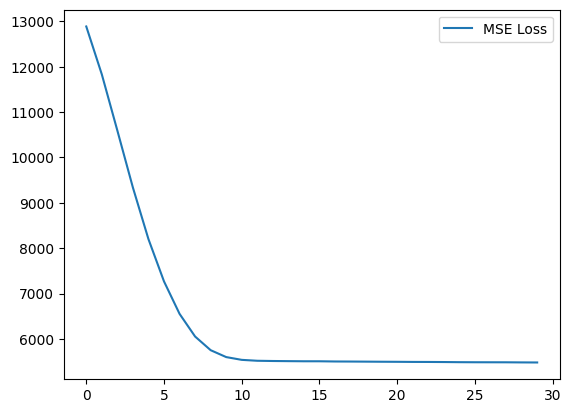

In [1255]:
model, history = train_model(model, X_train, y_train, epochs=30, batch_size=64)

In [1258]:
def create_seq_test(X, window_size):
  X_windows, y_windows = [], []

  for i in range(window_size, len(X)):
    X_windows.append(X[i-window_size:i])

  return np.array(X_windows)

In [1260]:
# Prepare the test data
X_test = test.drop(['No', 'Is', 'TEMP'], axis=1)
X_test = np.expand_dims(X_test, axis=1)

# Make predictions on the test set using trained model to predict "pm2.5" concentrations
predictions = model.predict(X_test)

# Ensure predictions do not contain NaN values
predictions = np.nan_to_num(predictions)

# Convert predictions to integerswhats next
predictions = np.round(predictions).astype(int)

# Prepare the submission file
# Convert 'row ID' index to string and remove leading zeros for single-digit hours
submission = pd.DataFrame({
    'row ID': pd.to_datetime(test.index).strftime('%Y-%m-%d %-H:%M:%S'),  # Remove leading zeros for hours
    'pm2.5': predictions.flatten()
})

# Sort the submission by 'row ID' to match the solution file exactly
submission = submission.sort_values(by='row ID')

# Save the file in CSV format for submission on Kaggle
submission.to_csv('/content/drive/MyDrive/Kaggle_competition_ML/air_quality_forcasting/subm_fixed.csv', index=False)

411/411 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
